In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = [0.5, 1.0],
        m_rate = [0.5, 1.0],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5],
        scale_hyperparameter = False,
        regularizer = l2_regularizer))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    itr = century + breakpoint
    '''
    model.optimizer.rr = model.optimizer.rr * 0.9
    model.optimizer.gf = model.optimizer.gf * 0.9
    model.optimizer.crossover_rate = model.optimizer.crossover_rate * 0.9
    model.optimizer.mutation_rate = model.optimizer.mutation_rate * 1.1
    '''
    model.optimizer.rr = model.optimizer.radioactive_rating[1] - (model.optimizer.radioactive_rating[1] - model.optimizer.radioactive_rating[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.gf = model.optimizer.grow_factor[1] - (model.optimizer.grow_factor[1] - model.optimizer.grow_factor[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.crossover_rate = model.optimizer.x_rate[1] - (model.optimizer.x_rate[1] - model.optimizer.x_rate[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.mutation_rate = model.optimizer.m_rate[0] + (model.optimizer.m_rate[1] - model.optimizer.m_rate[0]) / EPOCHS * (EPOCHS - itr)
    

C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)
C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=Fal

Checkpoint 100, Accuracy: 0.8888888888888888, Loss: 0.4304941671865958
Checkpoint 200, Accuracy: 0.8950617283950617, Loss: 0.4153702700579608
Checkpoint 300, Accuracy: 0.8888888888888888, Loss: 0.4052832214920609
Checkpoint 400, Accuracy: 0.8888888888888888, Loss: 0.3909232528121383
Checkpoint 500, Accuracy: 0.8888888888888888, Loss: 0.3844627451013636


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.8301351  0.08999237 0.0798725 ]
[1. 0. 0.] <-> [0.76987314 0.13468838 0.09543841]
[1. 0. 0.] <-> [0.8165138  0.10601965 0.07746653]
[0. 1. 0.] <-> [0.50381815 0.4573814  0.03880043]
[1. 0. 0.] <-> [0.83007354 0.03587992 0.13404644]
[1. 0. 0.] <-> [0.8255063  0.11336437 0.06112933]
[1. 0. 0.] <-> [0.77746964 0.0818724  0.14065796]
[1. 0. 0.] <-> [0.87745166 0.05992478 0.06262363]
[0. 1. 0.] <-> [0.27479878 0.6983739  0.02682726]
[1. 0. 0.] <-> [0.83453965 0.09172577 0.07373463]
[0. 1. 0.] <-> [0.59888464 0.36625698 0.03485842]
[1. 0. 0.] <-> [0.7331538  0.19929186 0.06755437]
[1. 0. 0.] <-> [0.79135245 0.13455507 0.07409251]
[0. 1. 0.] <-> [0.6061938  0.34469646 0.04910978]
[0. 0. 1.] <-> [0.20950463 0.02533422 0.7651611 ]
[1. 0. 0.] <-> [0.8189878  0.11113486 0.0698773 ]
[0. 1. 0.] <-> [0.48789972 0.4716258  0.04047454]
[1. 0. 0.] <-> [0.71360296 0.2300731  0.05632397]
[1. 0. 0.] <-> [0.7446017  0.21042778 0.04497048]
[0. 0. 1.] <-> [0.5837412  0.03910522 0.37715358]


In [12]:
# Testing Performance

C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


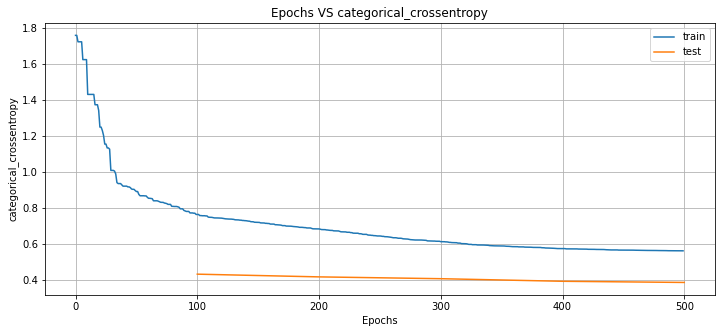

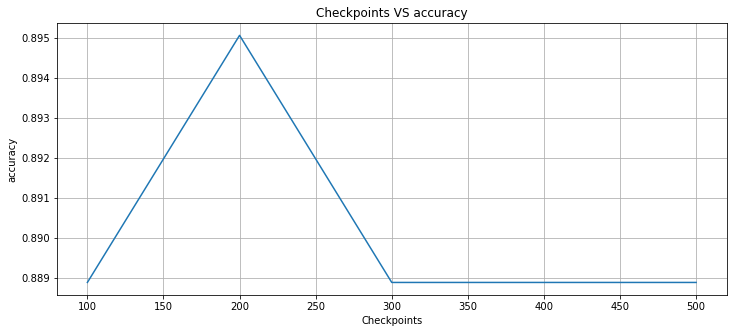

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8888888888888888, 'mean_square_error': 0.2362897584251705, 'categorical_crossentropy': 0.4304941671865958, 'precision': 0.8333333333333334, 'recall': 0.8333333333333334, 'f1': 0.8333333333333334, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 18, 'tn_hit': 12, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 7}, 2: {'tp_hit': 3, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 11}}, 'checkpoint': 100} 


{'accuracy': 0.8950617283950617, 'mean_square_error': 0.22649086309413496, 'categorical_crossentropy': 0.4153702700579608, 'precision': 0.8425925925925926, 'recall': 0.8425925925925926, 'f1': 0.8425925925925926, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 17, 'tn_hit': 13, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 7}, 2: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 10}}, 'checkpoint': 200} 


{'accuracy': 0.8888888888888888, 'mean_square_error': 0.22060687600148293, 'categorical_crossentropy': 0.4052832214920609, 'precision

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-0.42940807  0.8645006   0.2018605  -0.5550379  -0.5896436 ]
 bias: 0.4762560725212097

Neuron 1: weights:
[ 0.2712772  -0.66208893 -0.08440129  0.55648637  0.7818389 ]
 bias: -0.523216962814331

Neuron 2: weights:
[ 0.48937005 -0.81340826 -0.5970404   0.1463255   0.25460362]
 bias: 0.09325039386749268

Neuron 3: weights:
[ 0.47468245 -0.83222574 -0.95892596 -1.0238805  -0.7686864 ]
 bias: 0.18457722663879395

$
Layer 2
Neuron 0: weights:
[ 0.4911516  -0.5907553   0.28060192  1.757753  ]
 bias: 0.08852776139974594

Neuron 1: weights:
[ 1.369733  -0.7056465 -1.1990635 -1.3349963]
 bias: 0.4474509656429291

Neuron 2: weights:
[-1.6477058  1.3446375  0.667165  -0.3858293]
 bias: -0.19415618479251862

$

